#  A fatigue-life (Birnbaum-Saunders) continuous random variable.



In [40]:
import itertools

import matplotlib.pyplot as plt
import matplotlib as mpl
from pymc3 import Model, Normal, Slice
from pymc3 import sample
from pymc3 import traceplot
from pymc3.distributions import Interpolated
import pymc3 as mc
from theano import as_op
import theano.tensor as tt
import numpy as np
from scipy import stats
import tqdm
import pandas as pd
import spacepy.toolbox as tb

%matplotlib inline

%load_ext version_information

%version_information pymc3, scipy



The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.6.2 64bit [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
IPython 6.1.0
OS Darwin 15.6.0 x86_64 i386 64bit
pymc3 3.1
scipy 0.19.1
Thu Sep 21 11:33:50 2017 MDT

## https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fatiguelife.html#scipy.stats.fatiguelife

In [41]:
def fatiguelife_pdf(x, c):
    return (x+1) / (2*c*np.sqrt(2*np.pi*x**3)) * np.exp(-(x-1)**2/(2*x*c**2))

(1e-05, 10)

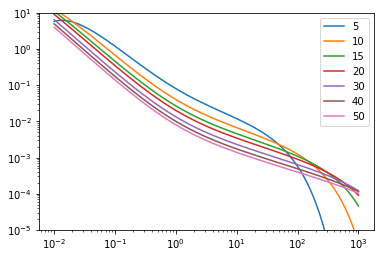

In [43]:
x = tb.logspace(1e-2, 1e3, 1000)
for c in [5,10,15,20,30,40,50]:
    plt.loglog(x, fatiguelife_pdf(x, c), label='{}'.format(c))
plt.legend()
plt.ylim((1e-5, 10))

# Do this in pymc3

In [51]:
c=5
def fatiguelife_pdf_dist(x, c=5):
    ans = tt.log((tt.abs_(x)+1) / (2*c*tt.sqrt(2*np.pi*tt.abs_(x)**3)) * 
                 tt.exp(-(tt.abs_(x)-1)**2/(2*tt.abs_(x)*c**2)))
    return ans

In [52]:
with mc.Model() as model:
    fatiguelife = mc.DensityDist('fatiguelife', logp=fatiguelife_pdf_dist, testval=2)

    trace = mc.sample(2000, njobs=2)




Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 2.0764:   1%|          | 2371/200000 [00:00<00:16, 12026.75it/s]
Convergence archived at 2400
Interrupted at 2,400 [1%]: Average Loss = 1.8816
 42%|████▏     | 1038/2500 [00:14<00:16, 88.31it/s]/Users/balarsen/miniconda3/envs/python3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:440: UserWarning: The acceptance probability in chain 1 does not match the target. It is 0.558315952941, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
/Users/balarsen/miniconda3/envs/python3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:456: UserWarning: Chain 1 contains 5 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|█████████▉| 2498/2500 [00:49<00:00, 22.27it/s] /Users/balarsen/miniconda3/envs/python3/lib/python3.6/site-packages/pymc3/step_m

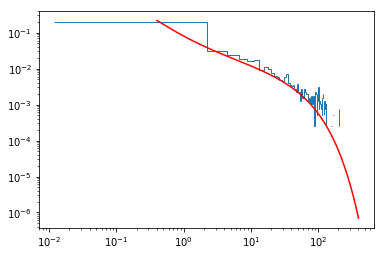

In [73]:
trace['fatiguelife'][trace['fatiguelife']>0]
plt.hist(trace['fatiguelife'][trace['fatiguelife']>0], 100, normed=True, histtype='step');
plt.yscale('log')

x = tb.linspace(0, 400, 1000)
plt.loglog(x, fatiguelife_pdf(x, 5), c='r')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ab7a978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12ce124e0>]], dtype=object)

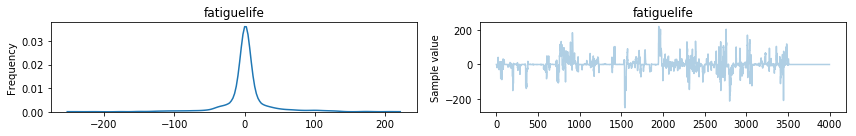

In [76]:
traceplot(trace, combined=True)

In [ ]:
tt.abs_

In [35]:
mc.DensityDist?

In [72]:
plt.hist?